In [19]:
# Importing all modules
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [20]:
# Starting time
start = time.time()

In [21]:
# Importing the dataset
Epldata_df = pd.read_csv('Data/epldata_final.csv')
print(Epldata_df.head(10))

X = Epldata_df.iloc[:,[4, 6, 13, 14, 15]] 
y = Epldata_df['market_value'].values.reshape(-1,1)

                name     club  age position  position_cat  market_value  \
0     Alexis Sanchez  Arsenal   28       LW             1          65.0   
1         Mesut Ozil  Arsenal   28       AM             1          50.0   
2          Petr Cech  Arsenal   35       GK             4           7.0   
3       Theo Walcott  Arsenal   28       RW             1          20.0   
4  Laurent Koscielny  Arsenal   31       CB             3          22.0   
5    Hector Bellerin  Arsenal   22       RB             3          30.0   
6     Olivier Giroud  Arsenal   30       CF             1          22.0   
7      Nacho Monreal  Arsenal   31       LB             3          13.0   
8   Shkodran Mustafi  Arsenal   25       CB             3          30.0   
9         Alex Iwobi  Arsenal   21       LW             1          10.0   

   page_views  fpl_value fpl_sel  fpl_points  region     nationality  \
0        4329       12.0  17.10%         264     3.0           Chile   
1        4395        9.5   5.6

The mean cross val score with lasso regression is  0.43342784795822664


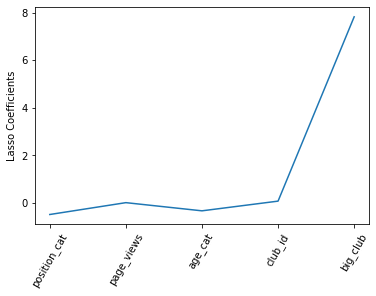

In [22]:
# Applying Lasso Regression
lasso = Lasso(alpha=0.01, normalize=True)
cv_lasso = cross_val_score(lasso, X, y, cv=5)
print('The mean cross val score with lasso regression is ', np.mean(cv_lasso))

# Feature selction with lasso
Ft_names = X.columns
lassocoef = lasso.fit(X,y).coef_
_ = plt.plot(range(len(Ft_names)), lassocoef)
_ = plt.xticks(range(len(Ft_names)), Ft_names, rotation=60)
_ = plt.ylabel('Lasso Coefficients')
plt.show()

In [23]:
# Applying Random Forest Regression
model = RandomForestRegressor()

# Creating number of folds
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=20)

cv_rfr = cross_val_score(model, X, y.ravel(), cv=cv)
print('the mean cross val score with Random Forest Regression is ', np.mean(cv_rfr))

the mean cross val score with Random Forest Regression is  0.6290864862843135


In [24]:
# Ending time
end = time.time()

# Printing total runtime of the program
print('The total runtime of MV of EPL players is: ', (end-start))

The total runtime of MV of EPL players is:  1.1846611499786377
